# Hochschule Bonn-Rhein-Sieg

# Mathematics for Robotics and Control

# Eigenfaces 

## Manoj

In [1]:
try:
    shell = get_ipython()
    shell.enable_pylab("inline")
except NameError:
    pass

import numpy as np
import matplotlib.pyplot as plt
            
from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs
import IPython
import imageio

from typing import Tuple, Sequence

## Eigenfaces 

Eigenvectors have many applications which are not limited to obtaining surface normals from a set of point clouds. Writing your own facial recognition library. Take a look at the following image:

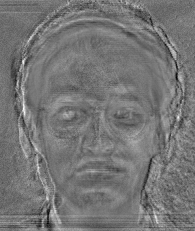

In [4]:
IPython.core.display.Image("images/my.png")

This is what is called an eigenface. An eigenface really is nothing else than an eigenvector, in this case reshaped for plotting. Eigenfaces can be used in facial recognition, allowing a robot to distinguish between different persons, but can also be applied to other use cases, such as voice or gesture recognition.
Your task consists of the following subtasks:

1. Algorithm is based on [Scholarpedia article](http://www.scholarpedia.org/article/Eigenfaces).
2. Implement the eigenface algorithm described in the article. In particular, create a Python class that exposes (at least) two methods:
   1. A method for calculating eigenfaces given two parameters, namely (i) a set of images and (ii) subject ids that uniquely identify the subjects in the images.
   2. A method that takes one parameter - a list of query faces - and, for each face in the input list, finds the subject id of the most similar face. 

A dataset for training your recognition algorithm is given in the data/training folder. The images in the data/test folder will be used for testing the algorithm.



In [59]:
class FaceRecognition(object):
    def __init__(self):
        self.subject_ids = None
        self.faces = None
        self.eigenface_weights = None
        self.mean_image = None

    def eigenfaces(self, image_filenames: Sequence[str],subject_ids: Sequence[int]) -> None:
  
    #Creating a empty matrix to stack all image vectors
        Matrix_image = []
        for i in image_filenames:
            #Reading all matrix
            matrix = imageio.imread(i)
            #flattening the image for stacking
            vector_image = np.matrix.flatten(matrix)
            #stacking the image
            Matrix_image.append(vector_image)
        # Taking the mean for normalising
        mean = np.mean(Matrix_image,axis=0)
        # Creating empty matrix to stack all normalised value
        Normalised_matrix = []
        for m in range(len(image_filenames)):
            #Appending the image to Normalised Matrix
            Normalised_matrix.append(Matrix_image[m]-mean)
        # Finding the covariance of the normalised matrix
        CV = np.cov(Normalised_matrix)
        # finding the eigen values and eigen vectors
        w, v = np.linalg.eigh(CV)
        # Finding the eigen faces
        print(np.shape(v[:,-4:]))
        faces = np.matmul(np.transpose(v[:,-9:]), Normalised_matrix)
        plt.imshow(np.reshape(faces[0],[231,195]), cmap='gray')
        # Finding the eigen vector weights
        eigenface_weights = np.matmul(Normalised_matrix,np.transpose(faces))

        self.faces = faces
        self.eigenface_weights = eigenface_weights
        self.mean_image = mean
        self.subject_ids = subject_ids
        
    def recognize_faces(self, image_filenames: Sequence[str]) -> Sequence[int]:
        '''
        Finds the eigenfaces that have the highest similarity
        to the input images and returns a list with their indices.
        Keyword arguments:
        image_filenames -- A list of image filenames
        Returns:
        recognised_ids -- A list of ids that correspond to the classifier
        '''
        eigenface_weights = self.eigenface_weights
        faces = self.faces
        mean = self.mean_image
        subject_id = self.subject_ids
        projection = []
        prediction_id = []
        for i in image_filenames:
            image = imageio.imread(i)
            # Normalising the image
            Normalised_image = np.matrix.flatten(image) - mean
            # Finding the Eigenface weight of the test image
            eigenface_weights_test = np.matmul(Normalised_image,np.transpose(faces))
            # Appending all the eigenface weight to a projection matrix
            projection.append(eigenface_weights_test)

        for j in range(len(image_filenames)):
            # Taking the individual images eigenface weight
            image_weight_test = projection[j]
            all_weights = []
            for d in range(110):
                # Taking the individual eigenface weight of the model
                image_weight_model = eigenface_weights[d,:]
                # Subtracting the Test image eigenface weight with the eigenface weight model
                diff1 = image_weight_test - image_weight_model
                # Finding the sum of difference for comparison
                test_variation_from_original = np.sum(np.absolute(diff1))
                # Appending the value to all_weights for comparison
                all_weights.append(test_variation_from_original)
            # Taking the subject id and finding the index which has minimum value which means minimum variation.
            prediction_id.append(subject_id[all_weights.index(min(all_weights))])

        return prediction_id

# Testing the code

Test subject ids: [ 1  1  1  1  2  3  3  3  4  4  4  4  5  5  5  5  6  6  6  6  6  7  7  7
  7  8  8  8  9  9  9  9  9 10 10 10 11 11 11 11 11 12 12 12 13 13 14 14
 14 14 15 15 15 15 15]
(110, 4)
Predicted subject ids: [6, 1, 2, 1, 2, 3, 3, 8, 4, 4, 14, 4, 5, 5, 9, 5, 6, 6, 2, 6, 6, 7, 7, 7, 3, 8, 2, 8, 9, 9, 9, 9, 9, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 13, 7, 14, 14, 4, 14, 7, 3, 15, 15, 15]
Number of correct predictions = 43
Prediction accuracy = 0.7818181818181819


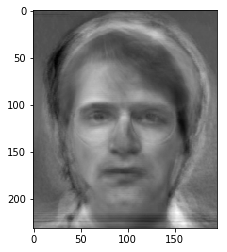

In [60]:
import os
import glob
#loading training images
training_image_filenames = sorted(glob.iglob('training/*.pgm'))

#loading test images
test_image_filenames = sorted(glob.iglob('test/*.pgm'))

#creating a lambda function for extracting filenames;
#the filename of each image is the subject id
subject_number = lambda filename: int(os.path.basename(filename)[7:9])

#extracting the filename using the lambda function
train_subject_ids = list (map(subject_number, training_image_filenames))
test_subject_ids = list (map(subject_number, test_image_filenames))

print('Test subject ids:', np.array(test_subject_ids))

face_recognition = FaceRecognition()
face_recognition.eigenfaces(training_image_filenames, train_subject_ids)
recognized_ids = face_recognition.recognize_faces(test_image_filenames)
print('Predicted subject ids:', recognized_ids)

different_results = np.array(test_subject_ids) - np.array(recognized_ids)
positives = (different_results == 0).sum()
accuracy = positives / (len(test_subject_ids) * 1.)
print('Number of correct predictions =', positives)
print('Prediction accuracy =', accuracy)